In [1]:
from pyqode.solver import Solver
import numpy as np
from pyqode.nozzle_2d import nasa_cdv_nozzle_verification_geometry
from pyqode.utils import r_to_k, psi_to_pa, meter_to_inch, area_to_radius
import matplotlib.pyplot as plt
from pyqode.solver import PostProcessor, gen_su2_setup, gen_multizone_su2_setup
from pathlib import Path

xA = np.loadtxt('/home/ppiper/Dropbox/local/thermal_nozzle/data/nozzle_air/nozzle.txt', delimiter=',')    
nx = xA[:,0]
sn = xA[:,1]

xn, sn = nasa_cdv_nozzle_verification_geometry(npts=100)

config_thermal_nozzle = {
    'working_dir': './new_run',
    'domain_x': xA[:,0],
    'domain_area': xA[:,1],
    'domain_size': 100,
    'bc_p0': 11.91e5,
    'bc_T0': 842.78,
    'bc_M': 0.0,
    'bc_pb': 101e3,
    'fluid_R': 287.0,
    'fluid_gamma': 1.4,
    'solver_itmax': 50000,
    'solver_itprint': 1,
    'solver_CFL': 0.5,
    'solver_tol': 1e-6,
    'solver_tscheme': 'Euler',
    'solver_fscheme': 'AUSM',
    'solver_dttype': 'Global',
    'solver_dim': 'Dimensionless',  
}

config_nasa_cdv = {
    'working_dir': './nasa_cdv',
    'domain_x': xn,
    'domain_area': sn,
    'domain_size': 51,
    'bc_p0': psi_to_pa(1.0),
    'bc_T0': r_to_k(100.0),
    'bc_M': 0.01,
    'bc_pb': psi_to_pa(0.75),
    'fluid_R': 287.0,
    'fluid_gamma': 1.4,
    'solver_itmax': 500000,
    'solver_itprint': 1,
    'solver_CFL': 0.1,
    'solver_tol': 1e-10,
    'solver_tscheme': 'Euler',
    'solver_fscheme': 'AUSM',
    'solver_dttype': 'Global',
    'solver_dim': 'Dimensionless',  
}

#Basic, Roe, Split, SplitTVD, VanLeer, LaxFriedrichs, StegerWarming, AUSM) 
#AUSM

config = config_nasa_cdv
eq1d = Solver(config = config, executable='/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/eulerQ1D')
eq1d.run()

################################################################################
                           -*- Q1D Euler Solver -*-
Eigen 3.3.7
Allan Moreira de Carvalho
################################################################################
                           -*- Setup Information -*-
################################################################################
# Domain x-coordinates at cell faces (no need for ghost cells)
/home/ppiper/Dropbox/local/github/pyqode/examples/nasa_cdv/inputs/xn.txt
# Area distributuin at cell faces (no need for ghost cells)
/home/ppiper/Dropbox/local/github/pyqode/examples/nasa_cdv/inputs/sn.txt
# Inlet Total Pressure [Pa]
6894.76
# Inlet Total Temperature [K]
55.55555555555556
# Inlet Mach Number
0.01
# Outlet Static Pressure [Pa]
5171.07
# Gas constant [J/kg/K]
287.0
# Specific heat ratio
1.4
# Maximum number of iterations 
500000
# Interval to print iterations 
1
# CFL number 
0.1
# Convergence criteria 
1e-10
# Time integration sc

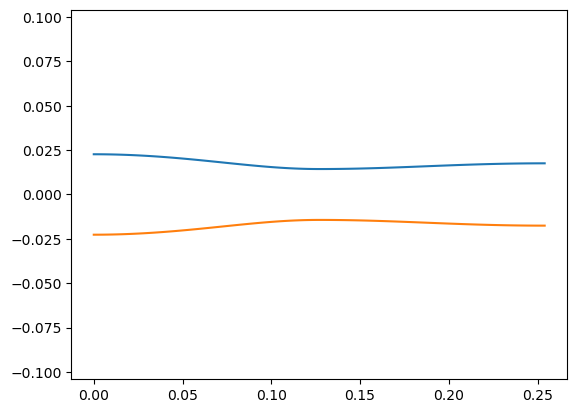

In [2]:
plt.axis('equal')
plt.plot( config['domain_x'], area_to_radius(config['domain_area']))
plt.plot( config['domain_x'], -area_to_radius(config['domain_area']))

In [3]:
pp = PostProcessor(f"{config['working_dir']}/outputs")

x
rese
u
p
resrhou
rho
S
e
T
M
resrho
c


(0.0, 2.0)

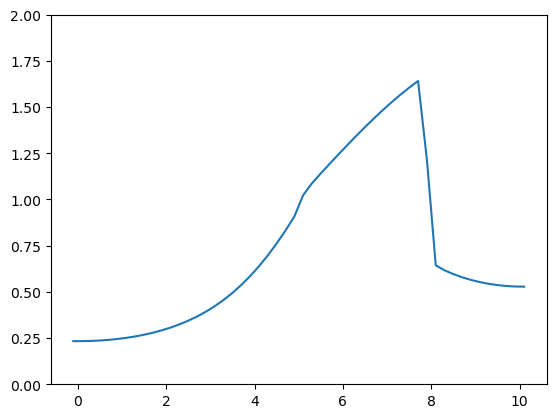

In [4]:

plt.plot(meter_to_inch(pp.x),pp.M)
plt.ylim(0,2)

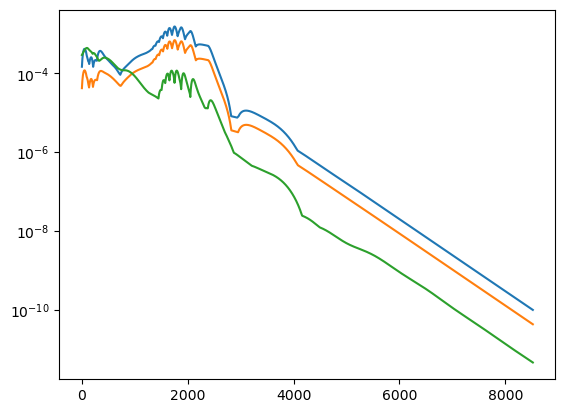

In [5]:
plt.plot(pp.rese)
plt.plot(pp.resrho)
plt.plot(pp.resrhou)

plt.yscale('log')

In [6]:
from pyqode.nozzle_2d import gen_nozzle_mesh, gen_wall_mesh, gen_multizone_mesh

In [7]:
inputs = PostProcessor(f'{config["working_dir"]}/inputs')

xn
sn


In [8]:
nozzle_mesh_file = gen_nozzle_mesh(
    xn=config['domain_x'],
    Sn=config['domain_area'],
    Nx=100,
    Ny=50,
    inflation_rate=1.2,
    output_file=f'{config["working_dir"]}/2d_mesh/nozzle',
    gmshsolver='/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/gmsh',
    symmetry=True
)

Info    : Running '/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/gmsh nasa_cdv/2d_mesh/nozzle.geo -0 -2 -format su2 -o nasa_cdv/2d_mesh/nozzle.su2' [Gmsh 4.9.1, 1 node, max. 1 thread]
Info    : Started on Tue Sep 19 23:38:10 2023
Info    : Reading 'nasa_cdv/2d_mesh/nozzle.geo'...
Info    : Done reading 'nasa_cdv/2d_mesh/nozzle.geo'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.0382105s, CPU 0.07333s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Transfinite)
Info    : Done meshing 2D (Wall 0.00743294s, CPU 0.012019s)
Info    : 5196 nodes 5347 elements
Info    : Writing 'nasa_cdv/2d_mesh/nozzle.su2'...
Info    : Writing 4851 elements and 5000 nodes
Info    : Done writing 'nasa_cdv/2d_mesh/nozzle.su2'
Info    : Stopped on Tue Sep 19 23:38:11 2023 (From start: Wall 0.12337s, CPU 0.21179s)


Info    : Running '/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/gmsh nasa_cdv/2d_mesh/nozzle.geo -0 -2 -format msh -o nasa_cdv/2d_mesh/nozzle.msh' [Gmsh 4.9.1, 1 node, max. 1 thread]
Info    : Started on Tue Sep 19 23:38:11 2023
Info    : Reading 'nasa_cdv/2d_mesh/nozzle.geo'...
Info    : Done reading 'nasa_cdv/2d_mesh/nozzle.geo'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.0221069s, CPU 0.037231s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Transfinite)
Info    : Done meshing 2D (Wall 0.00279557s, CPU 0.007421s)
Info    : 5196 nodes 5347 elements
Info    : Writing 'nasa_cdv/2d_mesh/nozzle.msh'...
Info    : Done writing 'nasa_cdv/2d_mesh/nozzle.msh'
Info    : Stopped on Tue Sep 19 23:38:11 2023 (From start: Wall 0.104702s, CPU 0.179912s)
Info    : Running '/home/ppiper/Dropbox/local/github/pyqode/py

In [9]:
wall_mesh_file = gen_wall_mesh(
    xn=config['domain_x'],
    Sn=config['domain_area'],
    thickness=0.005,
    Nx=100,
    Ny=10,
    inflation_rate=1.2,
    output_file=f'{config["working_dir"]}/2d_mesh/wall',
    gmshsolver='/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/gmsh',
    symmetry=True
)
    

Info    : Running '/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/gmsh nasa_cdv/2d_mesh/wall.geo -0 -2 -format su2 -o nasa_cdv/2d_mesh/wall.su2' [Gmsh 4.9.1, 1 node, max. 1 thread]
Info    : Started on Tue Sep 19 23:38:11 2023
Info    : Reading 'nasa_cdv/2d_mesh/wall.geo'...
Info    : Done reading 'nasa_cdv/2d_mesh/wall.geo'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Nurb)
Info    : [ 30%] Meshing curve 2 (Extruded)
Info    : [ 50%] Meshing curve 3 (Extruded)
Info    : [ 80%] Meshing curve 4 (Extruded)
Info    : Done meshing 1D (Wall 0.0017135s, CPU 0.001053s)
Info    : Meshing 2D...
Info    : Meshing surface 5 (Extruded)


Info    : Done meshing 2D (Wall 0.0475476s, CPU 0.07801s)
Info    : 1296 nodes 1408 elements
Info    : Writing 'nasa_cdv/2d_mesh/wall.su2'...
Info    : Writing 990 elements and 1100 nodes
Info    : Done writing 'nasa_cdv/2d_mesh/wall.su2'
Info    : Stopped on Tue Sep 19 23:38:11 2023 (From start: Wall 0.0812603s, CPU 0.132164s)
Info    : Running '/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/gmsh nasa_cdv/2d_mesh/wall.geo -0 -2 -format msh -o nasa_cdv/2d_mesh/wall.msh' [Gmsh 4.9.1, 1 node, max. 1 thread]
Info    : Started on Tue Sep 19 23:38:11 2023
Info    : Reading 'nasa_cdv/2d_mesh/wall.geo'...
Info    : Done reading 'nasa_cdv/2d_mesh/wall.geo'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Nurb)
Info    : [ 30%] Meshing curve 2 (Extruded)
Info    : [ 50%] Meshing curve 3 (Extruded)
Info    : [ 80%] Meshing curve 4 (Extruded)
Info    : Done meshing 1D (Wall 0.000957977s, CPU 0.001429s)
Info    : Meshing 2D...
Info    : Meshing surface 5 (Extruded)
Info    : Done mes

In [10]:
wall_mesh_file

'/home/ppiper/Dropbox/local/github/pyqode/examples/nasa_cdv/2d_mesh/wall.msh'

In [11]:
gen_multizone_mesh(
    input_meshes=[nozzle_mesh_file, wall_mesh_file],
    outputfile=f'{config["working_dir"]}/2d_mesh/multizone.su2',
    gmshsolver='/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/gmsh',   
)

'/home/ppiper/Dropbox/local/github/pyqode/examples/nasa_cdv/2d_mesh/multizone.su2'

In [22]:
config_su2 = {
    'turbulence_model': 'SST',
    'solver_dim': 'DIMENSIONAL',
    'fluid': 'STANDARD_AIR',
    'fluid_gamma': 1.4,
    'fluid_R': 287.0,
    'fluid_critical_temperature': 131.00,
    'fluid_critical_pressure': 3588550.0,
    'fluid_accentric_factor': 0.035,
    'fluid_viscosity_model': 'SUTHERLAND', 
    'fluid_sutherland_viscosity': 1.716E-5,
    'fluid_sutherland_temperature': 273.15,
    'fluid_sutherland_constant': 110.4,
    'fluid_conductivity_model': 'CONSTANT_PRANDTL',
    'fluid_laminar_prandtl': 0.72,
    'fluid_turbulent_prandtl': 0.9,
    'solver_CFL': 10,
    'domain_mesh': f'{config["working_dir"]}/2d_mesh/nozzle.su2',
    'bc_p0': psi_to_pa(1.0),
    'bc_T0': r_to_k(100.0),
    'bc_M': 1E-9,
    'bc_pb': psi_to_pa(0.75),
    'bc_Te': r_to_k(100.0),
    'fluid_R': 287.0,
    'fluid_gamma': 1.4,
    'solver_itmax': 50,
    'solver_tol': np.log10(1e-10),
    'solver_tscheme': 'EULER_IMPLICIT',
    'solver_fscheme': 'ROE',
    'solver_dttype': 'Global',
    'output_files': 'PARAVIEW',
    'solid_density': 1000,
    'multizone_mesh': Path(f'{config["working_dir"]}/2d_mesh/multizone.su2').resolve(),
    'working_dir': './nasa_cdv',
}

In [23]:
fluid_cfg = gen_su2_setup(
    template='fluid_su2.cfg',
    config=config_su2,
    output_file='./nasa_cdv/fluid.cfg'
)

In [24]:
fluid_cht_cfg = gen_su2_setup(
    template='fluid_cht_su2.cfg',
    config= config_su2,
    output_file='./nasa_cdv/fluid_cht.cfg'
)

solid_cht_cfg = gen_su2_setup(
    template='solid_cht_su2.cfg',
    config= config_su2,
    output_file='./nasa_cdv/solid_cht.cfg'
)



In [25]:
multizone_cht_cfg = gen_multizone_su2_setup(
    template='multizone_su2.cfg',
    config= config_su2,
    output_file='./nasa_cdv/multizone.cfg',
    config_list = [fluid_cht_cfg, solid_cht_cfg]
)

In [26]:
from pyqode.solver import SU2Solver

su2 = SU2Solver(
    config_file = multizone_cht_cfg, 
    executable = '/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/SU2-v8.0.0-linux64/bin/SU2_CFD',
)

In [27]:
su2.run()


-------------------------------------------------------------------------
|    ___ _   _ ___                                                      |
|   / __| | | |_  )   Release 8.0.0 "Harrier"                           |
|   \__ \ |_| |/ /                                                      |
|   |___/\___//___|   Suite (Computational Fluid Dynamics Code)         |
|                                                                       |
-------------------------------------------------------------------------
| SU2 Project Website: https://su2code.github.io                        |
|                                                                       |
| The SU2 Project is maintained by the SU2 Foundation                   |
| (http://su2foundation.org)                                            |
-------------------------------------------------------------------------
| Copyright 2012-2023, SU2 Contributors                                 |
|                                    

In [28]:
import pyvista as pv


vtu = pv.read('/home/ppiper/Dropbox/local/github/pyqode/examples/nasa_cdv/multizone.vtm')
vtu

MultiBlock (0x7f174c5624a0)
  N Blocks    2
  X Bounds    0.000, 0.254
  Y Bounds    0.000, 0.028
  Z Bounds    0.000, 0.000

/home/ppiper/micromamba/envs/pyqode/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


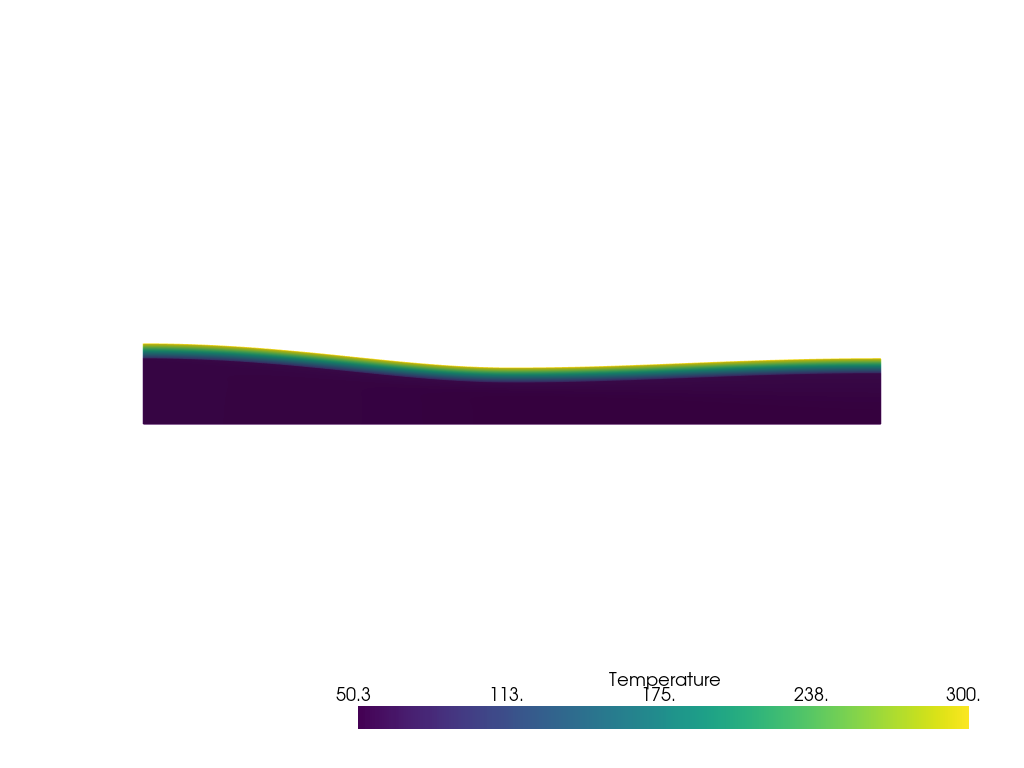

In [21]:
p = pv.Plotter()
p.add_mesh(vtu, scalars='Temperature')
p.show(cpos='xy')